# Opinion Dynamics

In this notebook we tested different OD models and compared them with synthetic networks
 
* Voter
* Majority Rule
* Sznajd


## Import libraries

In [31]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op



## Edgelist import 

In [32]:
df = pd.read_csv("../data_collection/data_biden/df_per_grafo_pesato.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
del df['Unnamed: 0']
del df['id_source']
del df['id_target']

In [33]:
df.source = df.source.astype(str)
df.target = df.target.astype(str)

g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph(), edge_attr = "weights")
#converto il grafo diretto in indiretto
g = g.to_undirected() #multigrafo (più collegamenti tra gli stessi nodi)

In [34]:
#k è il numero di nearest neighbour
#p = 0.2 small world, perché l'average short distance del rw è 5 (e può essere considerato sw)
ws = nx.watts_strogatz_graph(22737, k=4, p=0.2)
ba = nx.barabasi_albert_graph(22737, 2)

## Voter Model

* RW network

In [42]:
model = op.VoterModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

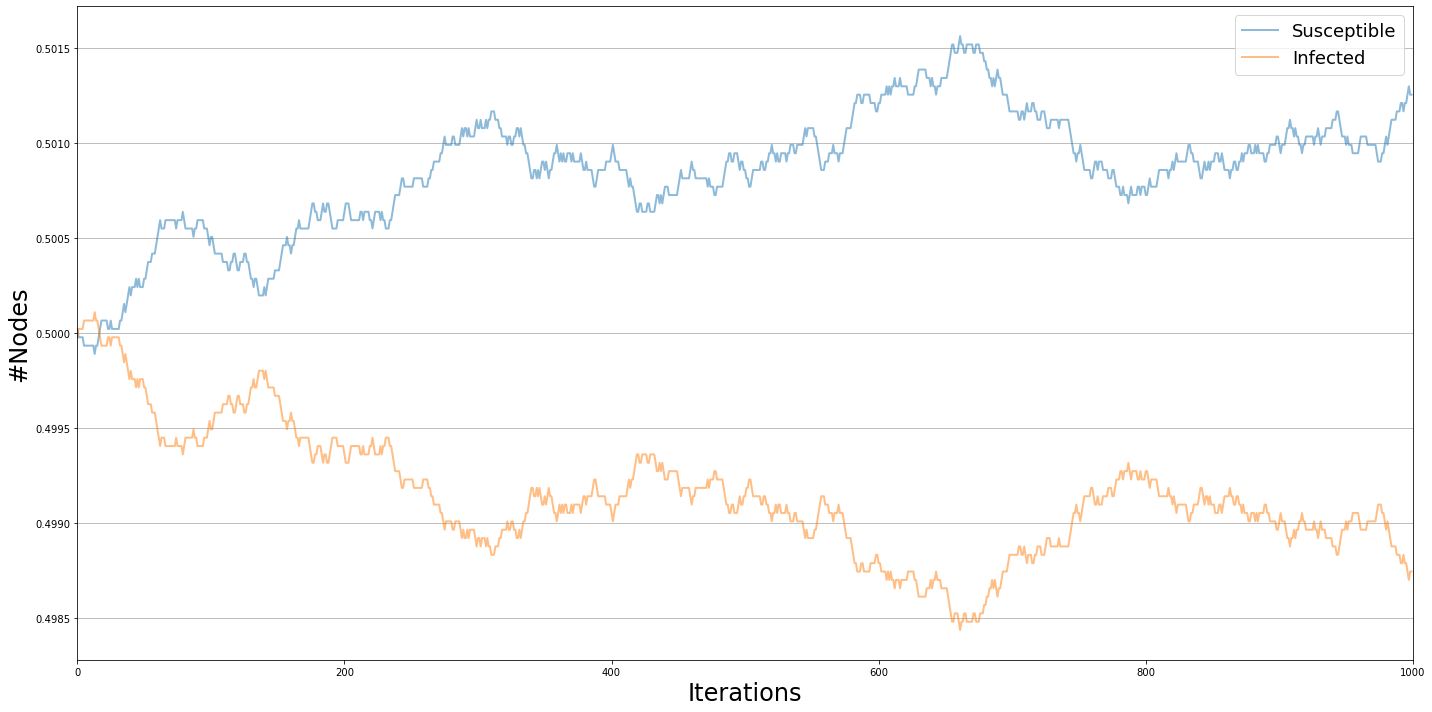

In [43]:
viz = DiffusionTrend(model, trends)
viz.plot()
plt.show()
#plt.savefig("plots/OD/Voter.png")

* BA 

In [ ]:
model = op.VoterModel(ba)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/VoterBA.png")

* WS

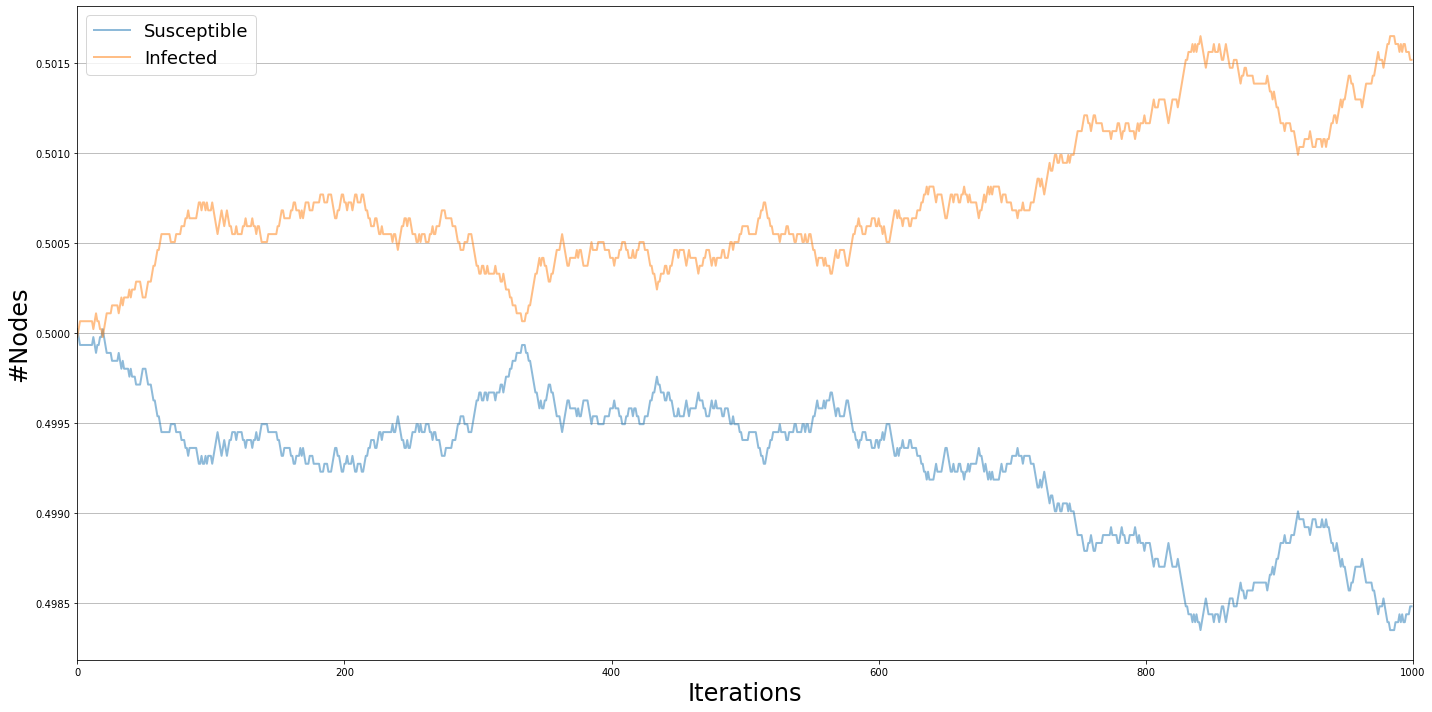

In [21]:
model = op.VoterModel(ws)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/VoterER.png")

## Majority Rule

* RW

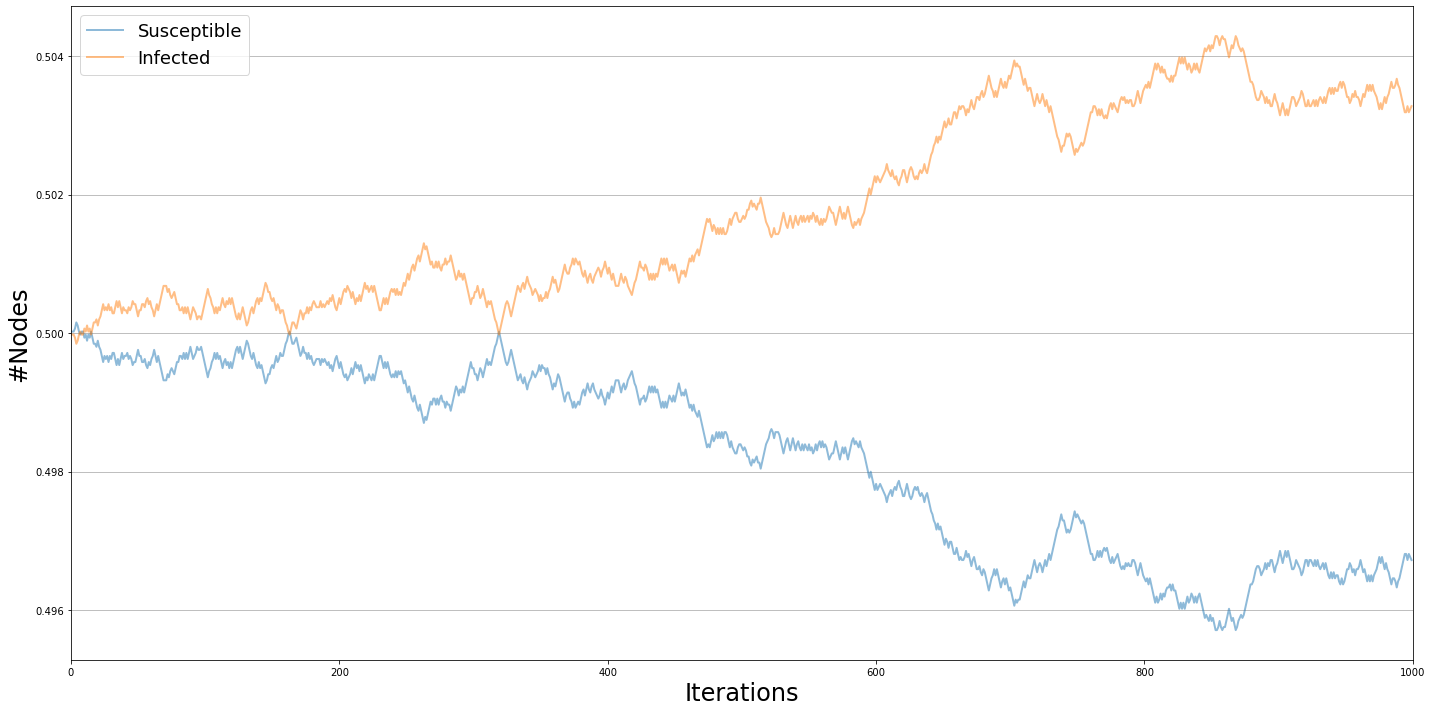

In [25]:
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/MajorityRule.png")

* BA

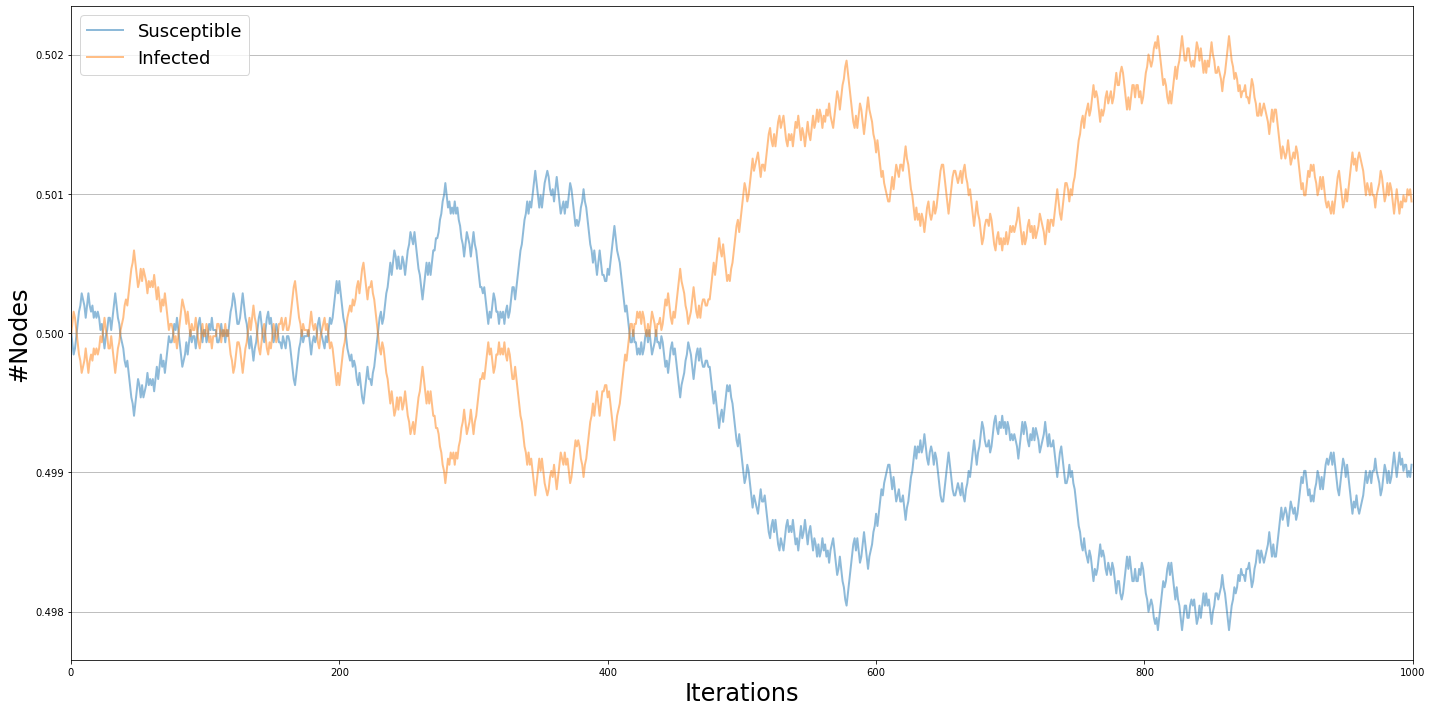

In [28]:
model = op.MajorityRuleModel(ba)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/MajorityRuleBA.png")

* WS

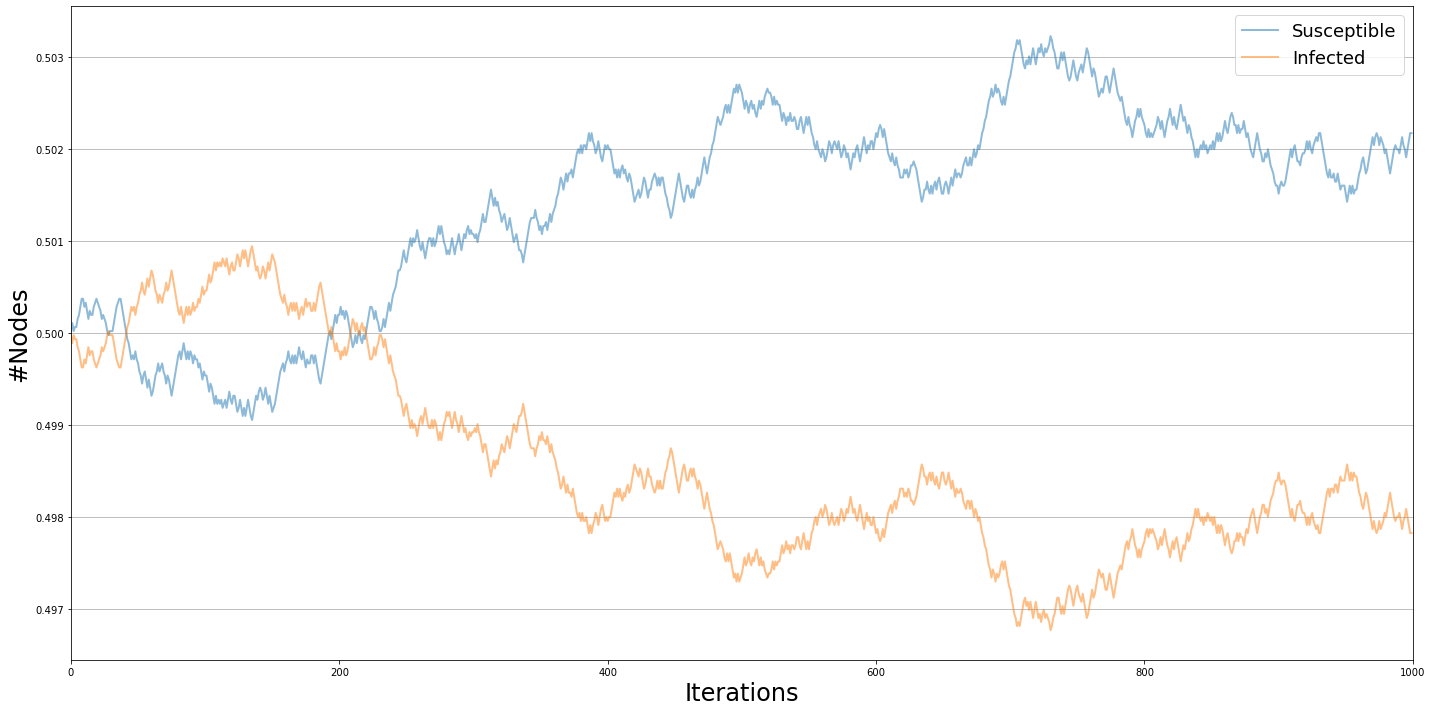

In [29]:
model = op.MajorityRuleModel(ws)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/MajorityRuleWS.png")

## Sznajd

* RW

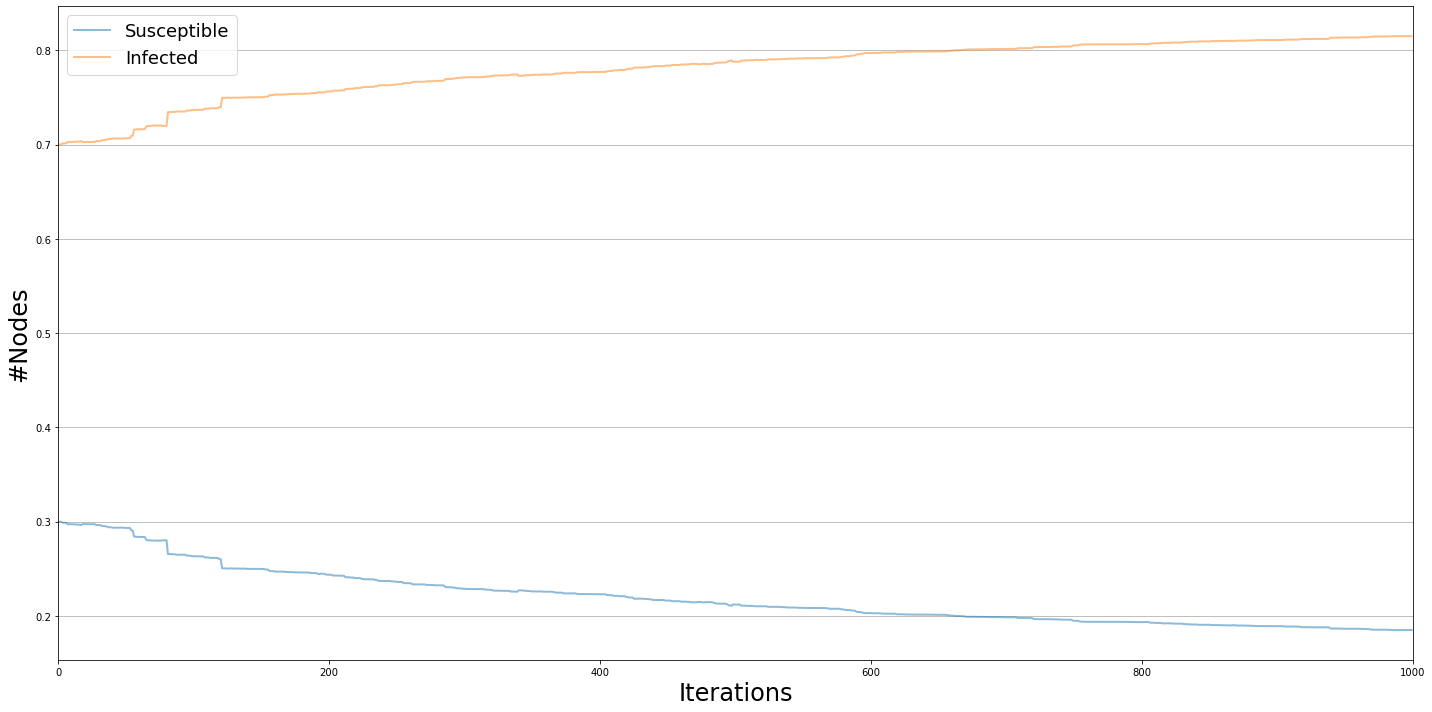

In [31]:
model = op.SznajdModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/Sznajd_RW.png")

* BA

100%|██████████| 2000/2000 [00:45<00:00, 44.09it/s]


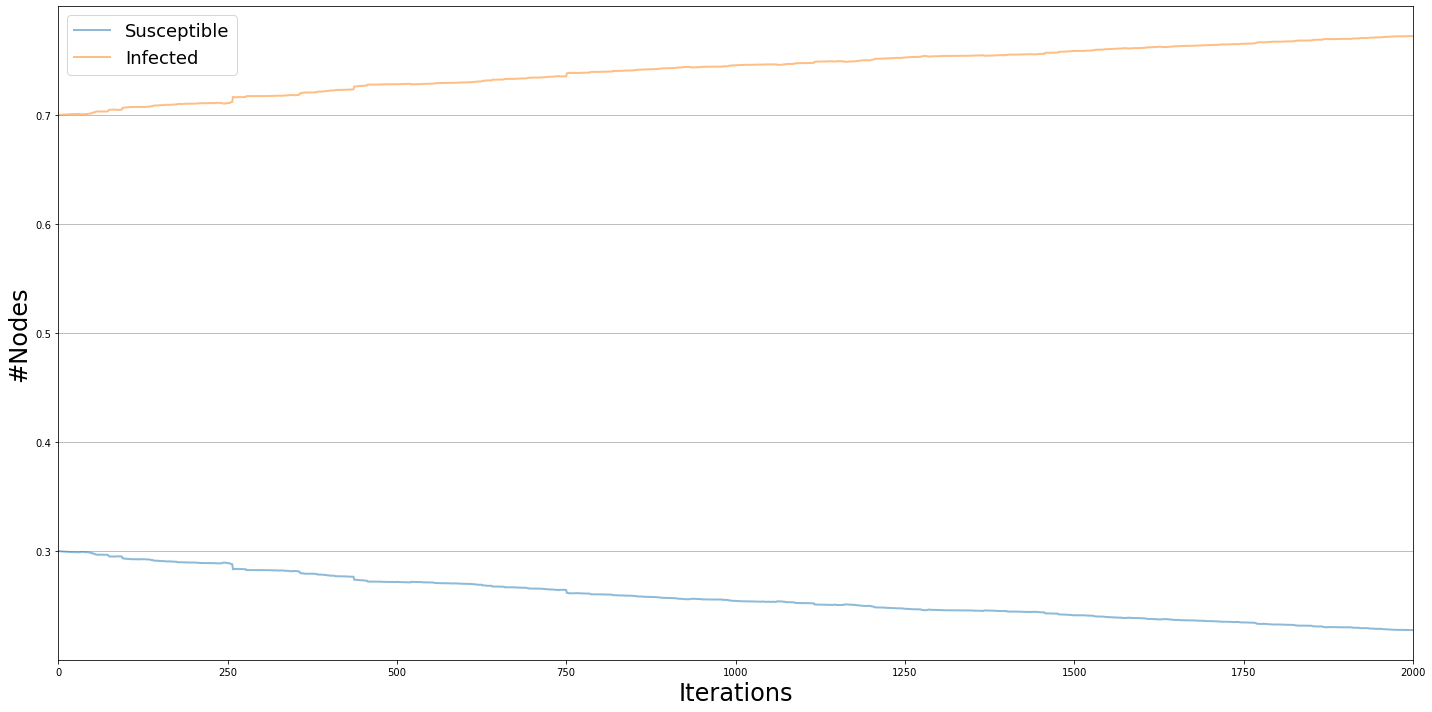

<Figure size 432x288 with 0 Axes>

In [22]:
model = op.SznajdModel(ba)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/Sznajd_BA.png")

* WS

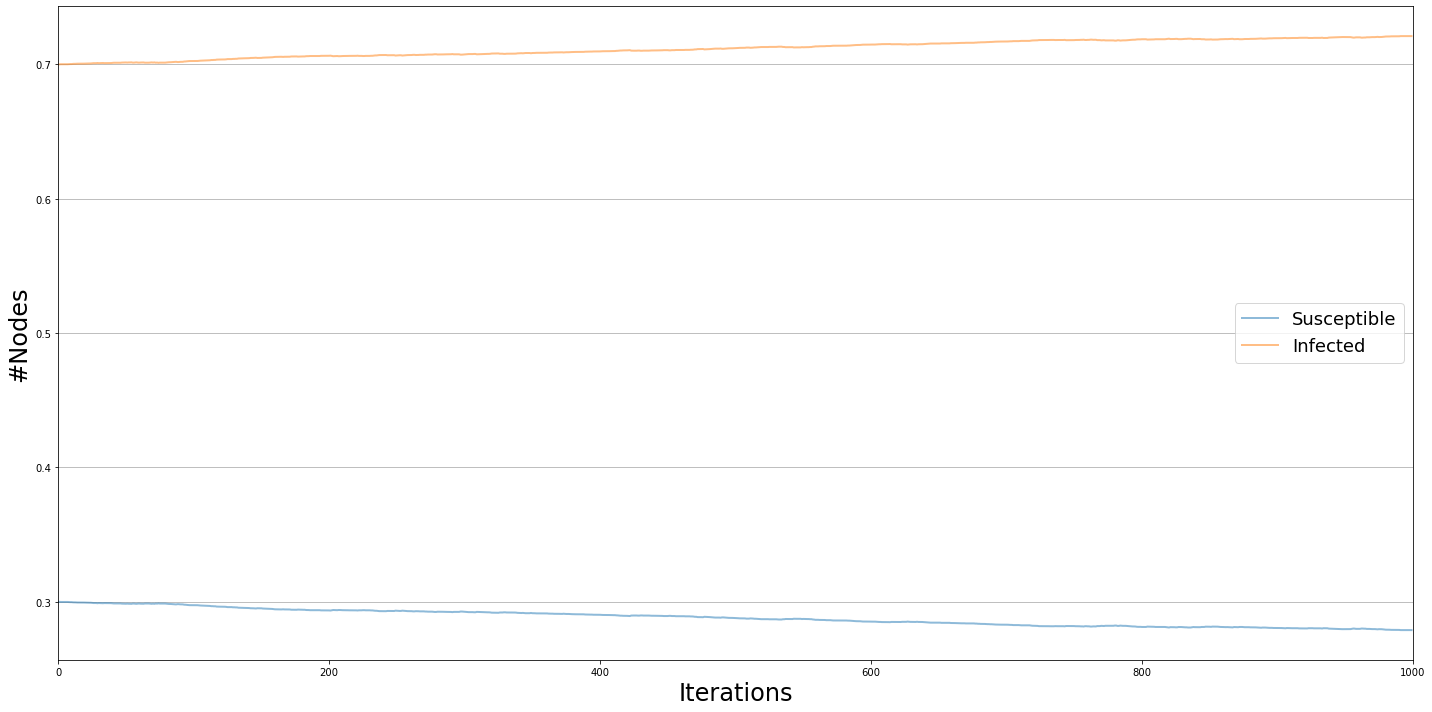

In [36]:
model = op.SznajdModel(ws)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
#plt.savefig("plots/OD/Sznajd_WS.png")